In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [13]:
df = pd.read_csv('owid_covid_data_us_subset.csv')
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,daily_case_change_rate,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate,7day_avg_new_cases,7day_avg_new_deaths,hospitalization_need,icu_requirement
0,2020-07-21,3853351.0,60012.0,145801.0,932.0,11390.679,430.994,11458.0,42195.0,30552.0,NaN,NaN,1.095021,0.297352,3.783746,NaN,NaN,High,High
1,2020-07-22,3911870.0,58519.0,146668.0,867.0,11563.663,433.557,12487.0,46107.0,31352.0,1.518652,0.594646,1.178643,0.319208,3.749307,NaN,NaN,High,High
2,2020-07-23,3975206.0,63336.0,147861.0,1193.0,11750.887,437.084,13916.0,47834.0,31679.0,1.619072,0.813402,1.203309,0.350070,3.719581,NaN,NaN,High,High
3,2020-07-24,4047622.0,72416.0,149052.0,1191.0,11964.952,440.604,13627.0,46748.0,31870.0,1.821692,0.805486,1.154950,0.336667,3.682458,NaN,NaN,High,High
4,2020-07-25,4120764.0,73142.0,150306.0,1254.0,12181.163,444.311,14402.0,51831.0,32804.0,1.807036,0.841317,1.257801,0.349498,3.647527,NaN,NaN,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1052.0,7949.0,8872.0,0.000000,0.000000,0.007685,0.001017,1.089701,13322.857143,277.571429,Low,Low
1030,2023-05-17,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1079.0,7785.0,8768.0,0.000000,0.000000,0.007526,0.001043,1.089701,13322.857143,277.571429,Low,Low
1031,2023-05-18,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1030.0,7576.0,8617.0,0.000000,0.000000,0.007324,0.000996,1.089701,13322.857143,277.571429,Low,Low
1032,2023-05-19,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1015.0,7613.0,8633.0,0.000000,0.000000,0.007360,0.000981,1.089701,13322.857143,277.571429,Low,Low


In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1034 non-null   datetime64[ns]
 1   total_cases               1034 non-null   float64       
 2   new_cases                 1034 non-null   float64       
 3   total_deaths              1034 non-null   float64       
 4   new_deaths                1033 non-null   float64       
 5   total_cases_per_million   1034 non-null   float64       
 6   total_deaths_per_million  1034 non-null   float64       
 7   icu_patients              1034 non-null   float64       
 8   hosp_patients             1034 non-null   float64       
 9   weekly_hosp_admissions    1034 non-null   float64       
 10  daily_case_change_rate    1033 non-null   float64       
 11  daily_death_change_rate   1032 non-null   float64       
 12  hospitalization_rate

In [16]:
# Turn str values 'High' and 'Low' to numerical values
def turn_numerical(value):
    if value == 'High':
        return 1
    else:
        return 0

In [17]:
df[['hospitalization_need_num', 'icu_requirement_num']] = df[['hospitalization_need', 
                                                              'icu_requirement']].map(turn_numerical)
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,...,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate,7day_avg_new_cases,7day_avg_new_deaths,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num
0,2020-07-21,3853351.0,60012.0,145801.0,932.0,11390.679,430.994,11458.0,42195.0,30552.0,...,NaN,1.095021,0.297352,3.783746,NaN,NaN,High,High,1,1
1,2020-07-22,3911870.0,58519.0,146668.0,867.0,11563.663,433.557,12487.0,46107.0,31352.0,...,0.594646,1.178643,0.319208,3.749307,NaN,NaN,High,High,1,1
2,2020-07-23,3975206.0,63336.0,147861.0,1193.0,11750.887,437.084,13916.0,47834.0,31679.0,...,0.813402,1.203309,0.350070,3.719581,NaN,NaN,High,High,1,1
3,2020-07-24,4047622.0,72416.0,149052.0,1191.0,11964.952,440.604,13627.0,46748.0,31870.0,...,0.805486,1.154950,0.336667,3.682458,NaN,NaN,High,High,1,1
4,2020-07-25,4120764.0,73142.0,150306.0,1254.0,12181.163,444.311,14402.0,51831.0,32804.0,...,0.841317,1.257801,0.349498,3.647527,NaN,NaN,High,High,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1052.0,7949.0,8872.0,...,0.000000,0.007685,0.001017,1.089701,13322.857143,277.571429,Low,Low,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1079.0,7785.0,8768.0,...,0.000000,0.007526,0.001043,1.089701,13322.857143,277.571429,Low,Low,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1030.0,7576.0,8617.0,...,0.000000,0.007324,0.000996,1.089701,13322.857143,277.571429,Low,Low,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1015.0,7613.0,8633.0,...,0.000000,0.007360,0.000981,1.089701,13322.857143,277.571429,Low,Low,0,0


In [18]:
df_copy = df.copy()
df_copy.to_csv('owid_covid_data_us_subset_modified.csv', index=False)

In [19]:
X = df.drop(columns=['date', 'hospitalization_need', 'icu_requirement', 'icu_requirement_num',
                     '7day_avg_new_cases', '7day_avg_new_deaths', 'new_deaths', 'daily_death_change_rate',
                     'daily_case_change_rate'])

y = df['icu_requirement_num'] # Target

In [20]:
def pre_rec_f1(y_pred, y):
    eps = np.finfo(float).eps
    num_cls = len(np.unique(y))
    tp_sum, fp_sum, fn_sum, f1_sum = 0, 0, 0, 0
    tps, fps, fns, pre, rec, f1s = [], [], [], [], [], []
    for i in range(num_cls):
        y_pred_i = y_pred == i
        y_i = y == i
        tp = np.logical_and(y_pred_i, y_i).sum()
        fp = np.logical_and(y_pred_i, (~y_i)).sum()
        fn = np.logical_and((~y_pred_i), y_i).sum()
        tp_sum += tp
        fp_sum += fp
        fn_sum += fn
        f1 = (2 * tp) / (2 * tp + fp + fn + eps)
        f1_sum += f1
        pre.append(tp / (tp + fp + eps))
        rec.append(tp / (tp + fn + eps))
        tps.append(tp)
        fps.append(fp)
        fns.append(fn)
        f1s.append(f1)

    macrof1 = f1_sum / (num_cls + eps)
    microf1 = (2 * tp_sum) / (2 * tp_sum + fp_sum + fn_sum + eps)
    return macrof1, microf1, tps, fps, fns, pre, rec, f1s


In [21]:
neighbor_sizes = [3, 9, 17, 25]
knn_results = []
# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
for n_neighbors in neighbor_sizes:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    macro_f1_scores = []
    micro_f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Custom function to calculate metrics
        macrof1, microf1, _, _, _, pre, rec, f1s = pre_rec_f1(y_pred, y_test)

        accuracy = accuracy_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(np.mean(pre))
        recall_scores.append(np.mean(rec))
        macro_f1_scores.append(macrof1)
        micro_f1_scores.append(microf1)

    knn_results.append({
        'Max Depth': n_neighbors,
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'Macro-F1': np.mean(macro_f1_scores),
        'Micro-F1': np.mean(micro_f1_scores)
    })


In [23]:
knn_results_df = pd.DataFrame(knn_results)
knn_results_df

,Max Depth,Accuracy,Precision,Recall,Macro-F1,Micro-F1
0,3,0.991304,0.990670,0.989982,0.990320,0.991304
1,9,0.992271,0.992183,0.990712,0.991409,0.992271
2,17,0.985498,0.988507,0.979385,0.983668,0.985498
3,25,0.973899,0.979375,0.963016,0.970433,0.973899


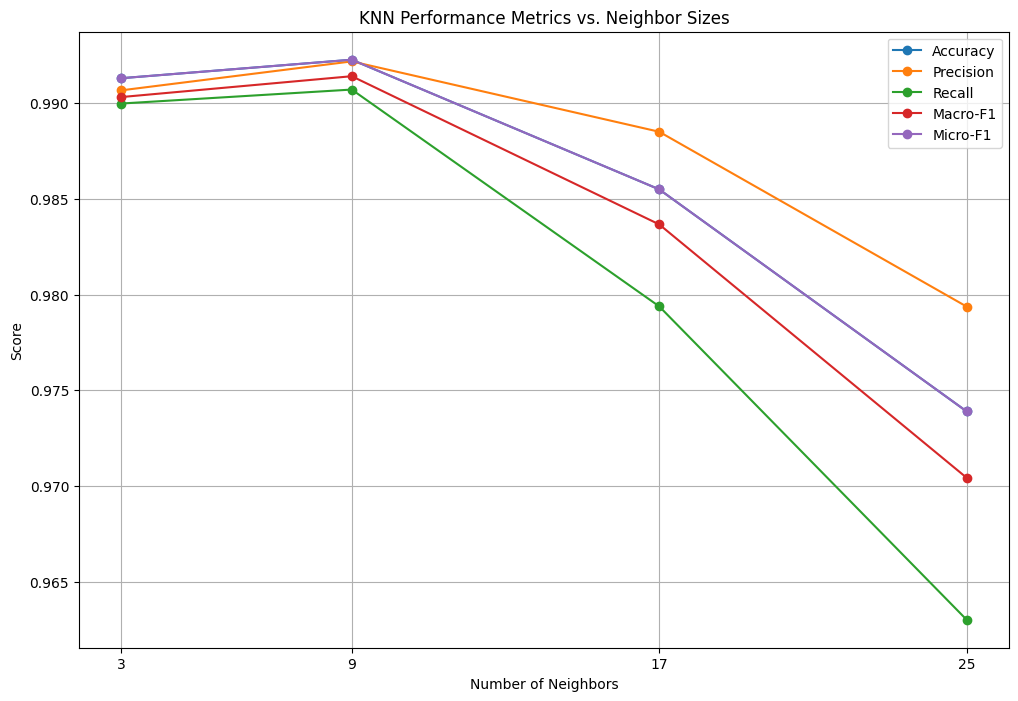

In [24]:
# Visualization

plt.figure(figsize=(12, 8))

for metric in ['Accuracy', 'Precision', 'Recall', 'Macro-F1', 'Micro-F1']:
    plt.plot(knn_results_df['Max Depth'], knn_results_df[metric], label=metric, marker='o')

plt.title('KNN Performance Metrics vs. Neighbor Sizes')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(knn_results_df['Max Depth'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Random Forest

# Random Forest with Stratified K-Fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
macro_f1_scores = []
micro_f1_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Calculate metrics
    # accuracy = accuracy_score(y_test, y_pred)
    macrof1, microf1, _, _, _, pre, rec, f1s = pre_rec_f1(y_pred, y_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    macro_f1_scores.append(report['macro avg']['f1-score'])
    micro_f1_scores.append(report['accuracy']) # micro correspond to accuracy

# Summary of results
rf_results = {
    'Accuracy': np.mean(accuracy_scores),
    'Precision': np.mean(precision_scores),
    'Recall': np.mean(recall_scores),
    'Macro-F1': np.mean(macro_f1_scores),
    'Micro-F1': np.mean(micro_f1_scores)
}

rf_results = pd.DataFrame(knn_results)
rf_results

,Max Depth,Accuracy,Precision,Recall,Macro-F1,Micro-F1
0,3,0.991304,0.990670,0.989982,0.990320,0.991304
1,9,0.992271,0.992183,0.990712,0.991409,0.992271
2,17,0.985498,0.988507,0.979385,0.983668,0.985498
3,25,0.973899,0.979375,0.963016,0.970433,0.973899
